# Predicting Building Energy Efficiency (Supervised Learning)
<p>
<b>Scenario<b> - You are working for an architecture firm, and your task is to build a model that predicts the energy efficiency rating of buildings based on features like wall area, roof area, overall height, etc.
</p>

## Import libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Generate synthetic dataset for building features and energy efficiency ratings

In [12]:
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}

In [13]:
# DataFrame creation
df = pd.DataFrame(data)
df.head()

,WallArea,RoofArea,OverallHeight,GlazingArea,EnergyEfficiency
0,372,135,4.824401,0.164319,18.700166
1,247,183,9.097578,0.893773,11.748627
2,317,176,4.255870,0.575062,33.839428
3,392,118,6.032951,0.256768,31.640361
4,267,174,5.275825,0.236790,26.259739


In [14]:
# Data preprocessing
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

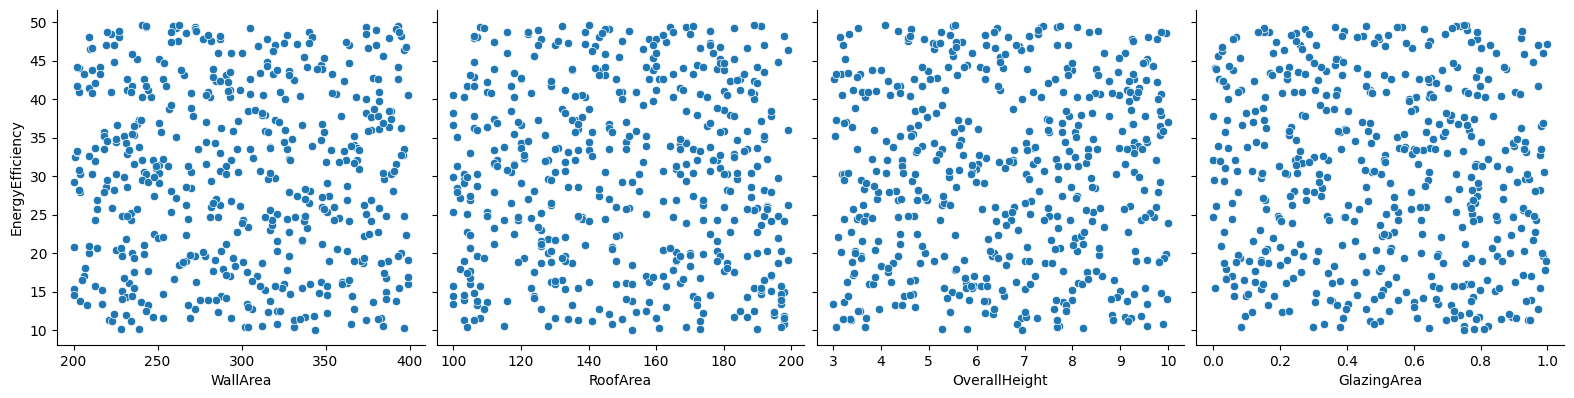

In [ ]:
# Visualize the relationships between features and the target variable (Energy Efficiency)
sns.pairplot(
    df, 
    x_vars=[
        'WallArea', 
        'RoofArea', 
        'OverallHeight', 
        'GlazingArea'], 
    y_vars='EnergyEfficiency', 
    height=4, 
    aspect=1, 
    kind='scatter'
)
plt.show()

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Random Forest model

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

## Predict and evaluate

In [22]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 146.00


## Plot the True values vs Predicted values

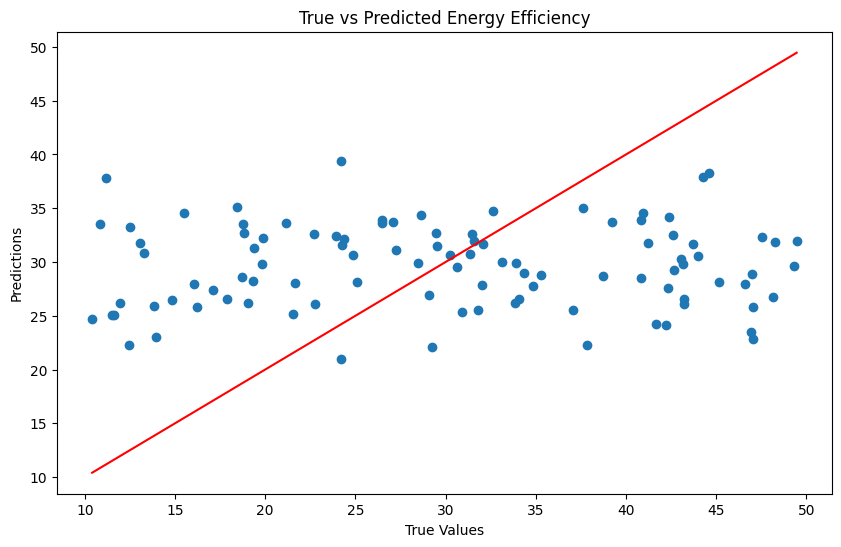

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Energy Efficiency')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()